<a href="https://colab.research.google.com/github/jaehyun99/Computer_Vision/blob/main/Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def nonmax_suppression(sobel, direct):      #비 최대치 억제 함수
    rows, cols = sobel.shape[:2]
    dst = np.zeros((rows, cols), np.float32)
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):      # 행렬 처리를 통해 이웃 화소 가져오기
            values = sobel[i-1:i+2, j-1:j+2].flatten()
            first = [3, 0, 1, 2]
            id = first[direct[i, j]]
            v1, v2 = values[id], values[8-id]
            dst[i, j] = sobel[i, j] if (v1 < sobel[i , j] > v2) else 0

    return dst

def trace(max_sobel, i, j, low, pos_ck, canny):
    h, w = max_sobel.shape
    if (0 <= i < h and 0 <= j < w) == False: return  # 추적 화소 범위 확인
    if pos_ck[i, j] == 0 and max_sobel[i, j] > low:
        pos_ck[i, j] = 255
        canny[i, j] = 255

        trace(max_sobel, i - 1, j - 1, low, pos_ck, canny)        # 추적 함수 재귀 호출 - 8방향 추적
        trace(max_sobel, i    , j - 1, low, pos_ck, canny)
        trace(max_sobel, i + 1, j - 1, low, pos_ck, canny)
        trace(max_sobel, i - 1, j    , low, pos_ck, canny)
        trace(max_sobel, i + 1, j    , low, pos_ck, canny)
        trace(max_sobel, i - 1, j + 1, low, pos_ck, canny)
        trace(max_sobel, i    , j + 1, low, pos_ck, canny)
        trace(max_sobel, i + 1, j + 1, low, pos_ck, canny)

def hysteresis_th(max_sobel, low, high):                # 이력 임계값 수행
    pos_ck = np.zeros(image.shape[:2], np.uint8)
    canny = np.zeros(image.shape[:2], np.uint8)

    rows, cols = max_sobel.shape[:2]
    for i in range(1, rows - 1):  # 에지 영상 순회
        for j in range(1, cols - 1):
            if max_sobel[i, j] > high:  trace(max_sobel, i, j, low, pos_ck, canny)  # 추적 시작

    return canny

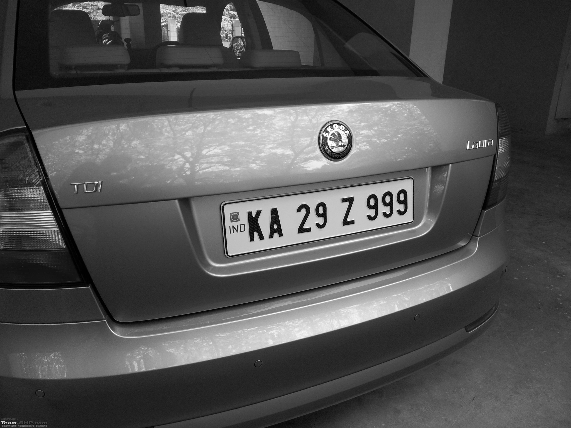

In [ ]:
image = cv2.imread('drive/MyDrive/PR201910807/images/lab04/car02.jpg', cv2.IMREAD_GRAYSCALE)

height = image.shape[0]
width = image.shape[1]
image =cv2.resize(image,(width//4, height//4))
cv2_imshow(image)

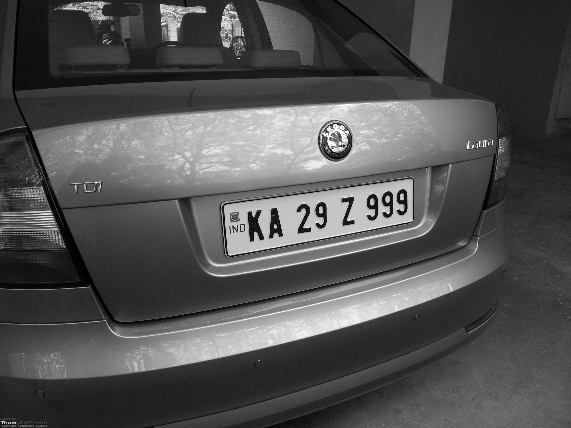

In [ ]:
gaus_img = cv2.GaussianBlur(image,(5,5),0.3)
cv2_imshow(gaus_img)

In [ ]:
Gx=cv2.Sobel(np.float32(gaus_img), cv2.CV_32F,1,0,3)
Gy=cv2.Sobel(np.float32(gaus_img), cv2.CV_32F,0,1,3)
sobel = np.fabs(Gx) + np.fabs(Gy)

directs = cv2.phase(Gx,Gy)/ (np.pi/4)
directs = directs.astype(int)%4

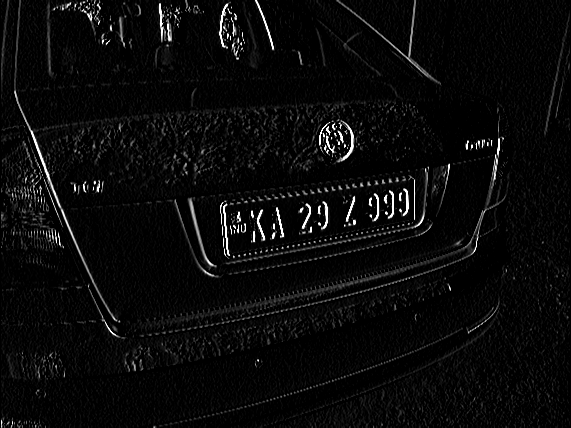

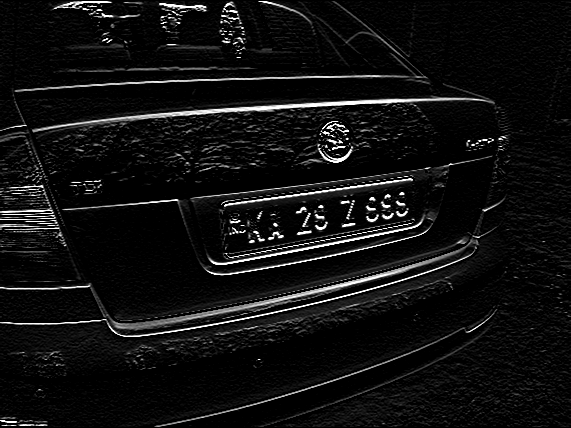

In [ ]:
cv2_imshow(Gx)
cv2_imshow(Gy)

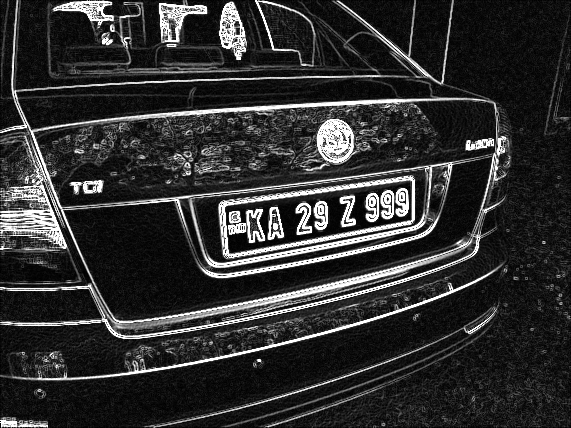

In [ ]:
cv2_imshow(sobel)

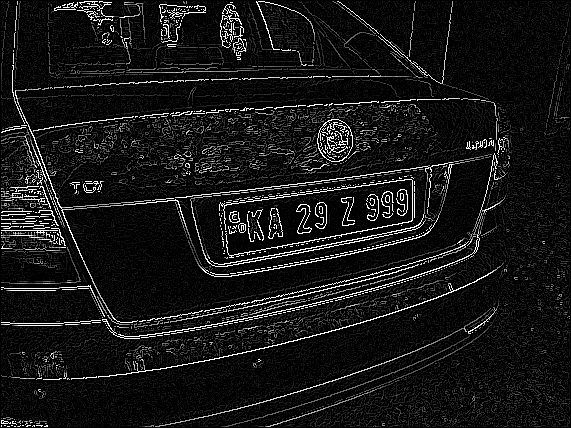

In [ ]:
max_sobel = nonmax_suppression(sobel, directs)
cv2_imshow(max_sobel)

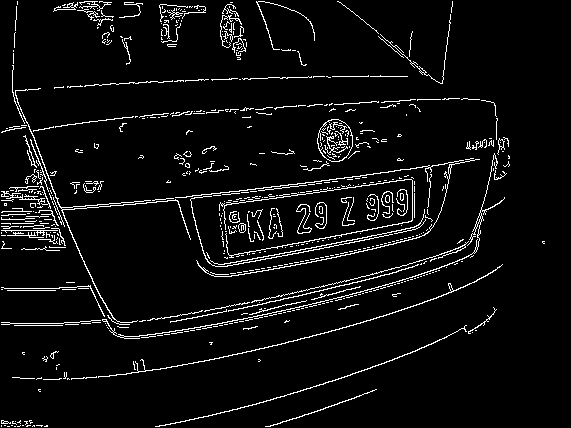

In [ ]:
canny = hysteresis_th(max_sobel, 100,200)

cv2_imshow(canny)

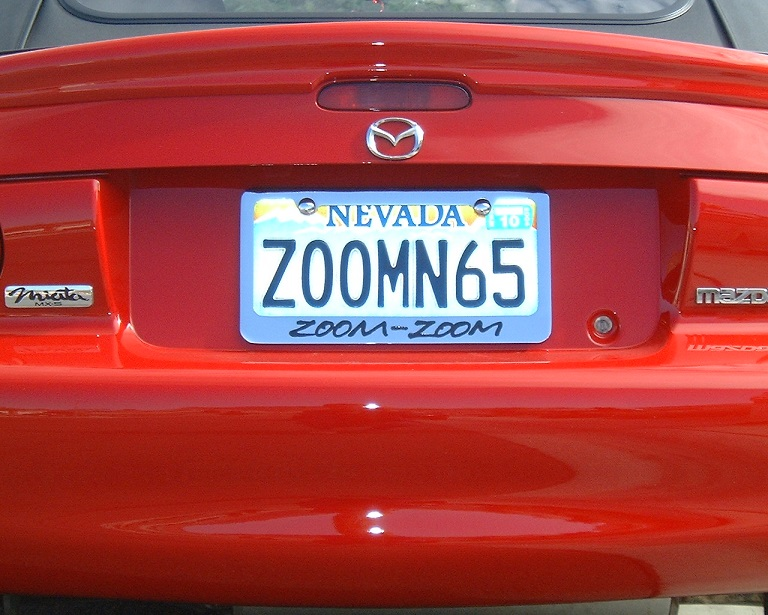

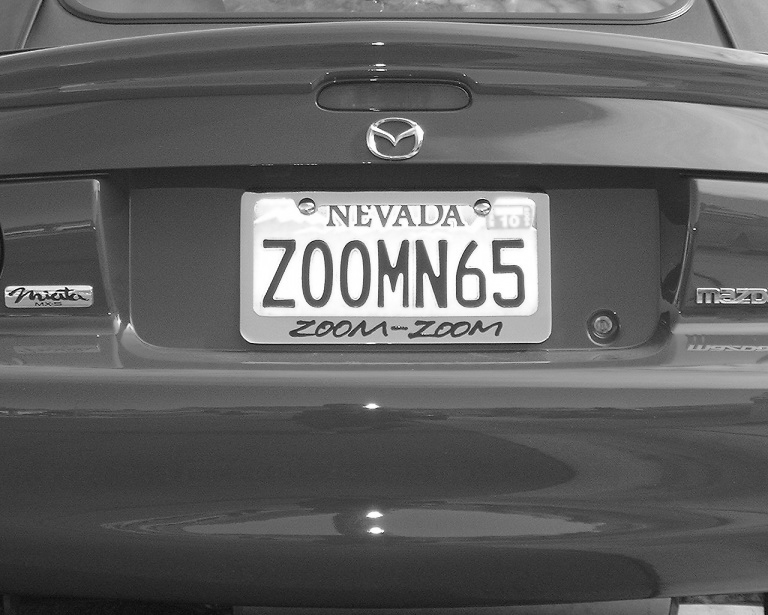

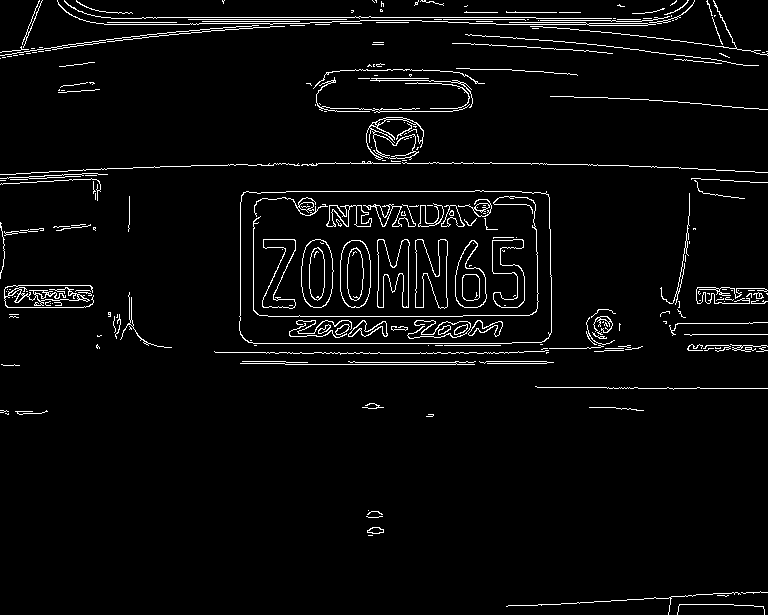

In [ ]:
#시험 시험 함수는 준다고 합니다.
img = cv2.imread('drive/MyDrive/PR201910807/images/lab04/car01.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 100, 200)

cv2_imshow(img)
cv2_imshow(gray)
cv2_imshow(edges)